<a href="https://colab.research.google.com/github/trehansalil/twitter_ner_analysis/blob/main/experimental_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.3 MB/s eta 0:00:00


In [2]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-nav25oxf
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-nav25oxf
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=ded0f42425f9a03a04c1453cf8fc0ef05245a0560cf6b3f129ca027ed0e8c0d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-dzmeu8j1/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [3]:
!nvidia-smi


Sat Mar 16 09:18:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
def read_conll(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        current_sentence = []
        for line in lines:
            line = line.strip()
            if line:
                parts = line.split('\t')
                current_sentence.append(parts)
            else:
                if current_sentence:
                    sentences.append(current_sentence)
                    current_sentence = []
        if current_sentence:
            sentences.append(current_sentence)
    return sentences

In [6]:
import pandas as pd

# Importing and understanding the structure of the data
train_data_path = '/content/wnut 16.txt.conll'
test_data_path = '/content/wnut 16test.txt.conll'

# Read and understand the structure of the data
train_sentences = read_conll(train_data_path)
test_sentences = read_conll(test_data_path)



In [7]:
combined_sentences = train_sentences+ test_sentences

In [8]:
print(len(train_sentences), len(train_sentences[0][0]))
print(len(test_sentences), len(test_sentences[0][0]))

print("Number of sentences in training data: ", len(train_sentences))
print("Number of sentences in testing data: ", len(test_sentences))

2394 2
3850 2
Number of sentences in training data:  2394
Number of sentences in testing data:  3850


In [9]:
print("Number of sentences in combined data: ", len(combined_sentences))

Number of sentences in combined data:  6244


In [10]:
words = []
labels = []

[words.extend([word[0] for word in sentence if word[0] not in words]) for sentence in combined_sentences]
[labels.extend([word[1] for word in sentence if word[1] not in labels]) for sentence in combined_sentences]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [11]:
len(words)

25815

In [12]:
words = list(set(words))
n_words = len(words)
print("Number of unique words in the dataset: ", n_words)

Number of unique words in the dataset:  25383


In [13]:

tags = list(set(labels))
n_tags = len(tags)
print("Number of unique labels in the dataset: ", n_tags)
print("Tags:", tags)

Number of unique labels in the dataset:  21
Tags: ['B-facility', 'I-product', 'I-geo-loc', 'I-facility', 'B-movie', 'I-musicartist', 'I-movie', 'I-other', 'B-other', 'I-person', 'I-tvshow', 'B-tvshow', 'B-musicartist', 'B-product', 'I-company', 'B-person', 'B-sportsteam', 'B-geo-loc', 'O', 'I-sportsteam', 'B-company']


In [14]:
import sklearn

# Vocabulary Key:word -> Value:token_index
# The first 2 entries are reserved for PAD and UNK
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1 # Unknown words
word2idx["PAD"] = 0 # Padding

# Vocabulary Key:token_index -> Value:word
idx2word = {i: w for w, i in word2idx.items()}

# Vocabulary Key:Label/Tag -> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

# Vocabulary Key:tag_index -> Value:Label/Tag
idx2tag = {i: w for w, i in tag2idx.items()}

word_map = 'Washington'

print(f"The word {word_map} is identified by the index: {word2idx[word_map]}")
print("The labels B-geo(which defines Geopraphical Enitities) is identified by the index: {}".format(tag2idx["B-tvshow"]))

The word Washington is identified by the index: 7775
The labels B-geo(which defines Geopraphical Enitities) is identified by the index: 12


In [15]:
max_len = max(len(seq) for seq in train_sentences)

In [16]:
import numpy as np
from keras.utils import to_categorical

#from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences

# Convert each sentence from list of Token to list of word_index
X = [[word2idx[w[0]] for w in s] for s in train_sentences]


# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=word2idx["PAD"])

# Convert each sentence from list of Token to list of word_index
X_test = [[word2idx[w[0]] for w in s] for s in test_sentences]


# Padding each sentence to have the same lenght
X_test = pad_sequences(maxlen=max_len, sequences=X_test, padding="post", value=word2idx["PAD"])

# Convert Tag/Label to tag_index
y = [[tag2idx[w[1]] for w in s] for s in train_sentences]

# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["PAD"])

# One-Hot encode
y = [to_categorical(i, num_classes=n_tags+1) for i in y]  # n_tags+1(PAD)

# Convert Tag/Label to tag_index
y_test = [[tag2idx[w[1]] for w in s] for s in test_sentences]

# Padding each sentence to have the same lenght
y_test = pad_sequences(maxlen=max_len, sequences=y_test, padding="post", value=tag2idx["PAD"])

# One-Hot encode
y_test = [to_categorical(i, num_classes=n_tags+1) for i in y_test]  # n_tags+1(PAD)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
X_train.shape, X_val.shape, np.array(y_train).shape, np.array(y_val).shape, X_test.shape, np.array(y_test).shape

((2154, 39),
 (240, 39),
 (2154, 39, 22),
 (240, 39, 22),
 (3850, 39),
 (3850, 39, 22))

In [17]:
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [18]:
words = list(set(words))
words.append("ENDPAD")

n_words = len(words); n_words

25384

In [19]:
len(tags)

21

In [20]:
from keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow as tf

# LSTM components
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

# CRF layer
from tensorflow_addons.layers import CRF

# Sigmoid focal cross entropy loss. works well with highly unbalanced input data
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from tensorflow_addons.optimizers import AdamW


def build_model(max_len = max_len, input_dim = n_words, embedding_dim = 200):
  import keras as k
  # Model definition
  input = Input(shape=(max_len,))

  # Get embeddings
  embeddings = Embedding(input_dim=input_dim,
                      output_dim=embedding_dim,
                      input_length=max_len, mask_zero=True)(input)

  # variational biLSTM
  output_sequences = Bidirectional(LSTM(units=200,
                                        return_sequences=True,
                                        dropout=0.3,
                                        recurrent_dropout=0.4,
                            kernel_initializer=k.initializers.he_normal()))(embeddings)

  # Stacking
  output_sequences = Bidirectional(LSTM(units=200, return_sequences=True,
                                        dropout=0.3,
                                        recurrent_dropout=0.4,
                           kernel_initializer=k.initializers.he_normal()))(output_sequences)
  output_sequences = LSTM(units=100,
              return_sequences=True,
              dropout=0.3,
              recurrent_dropout=0.4,
              kernel_initializer=k.initializers.he_normal())(output_sequences)

  output_sequences = LSTM(units=100,
              return_sequences=True,
              dropout=0.3,
              recurrent_dropout=0.4,
              kernel_initializer=k.initializers.he_normal())(output_sequences)

  output_sequences = LSTM(units=100,
              return_sequences=True,
              dropout=0.3,
              recurrent_dropout=0.4,
              kernel_initializer=k.initializers.he_normal())(output_sequences)

  output_sequences = LSTM(units=50,
              return_sequences=True,
              dropout=0.3,
              recurrent_dropout=0.4,
              kernel_initializer=k.initializers.he_normal())(output_sequences)

  # Adding more non-linearity
  dense_out = TimeDistributed(Dense(n_tags+1, activation="relu"))(output_sequences)

  # CRF layer
  crf = CRF(n_tags+1, name='crf')
  predicted_sequence, potentials, sequence_length, crf_kernel = crf(dense_out)

  model = Model(input, potentials)
  model.compile(
      optimizer=AdamW(weight_decay=0.00001),
      loss= SigmoidFocalCrossEntropy()) # Sigmoid focal cross entropy loss

  return model

model = build_model()

# model.compile(
#     optimizer=AdamW(weight_decay=0.001),
#     loss= SigmoidFocalCrossEntropy()) # Sigmoid focal cross entropy loss



# Checkpointing
save_model = tf.keras.callbacks.ModelCheckpoint(filepath='twitter_ner_crf.h5',
  monitor='val_loss',
  save_weights_only=True,
  save_best_only=True,
  verbose=1
)

# Early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)

callbacks = [save_model, es]

model.summary()

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 39)]              0         
                                                                 
 embedding (Embedding)       (None, 39, 200)           5076800   
                                                                 
 bidirectional (Bidirection  (None, 39, 400)           641600    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 39, 400)           961600    
 onal)                                                           
                                                                 
 lstm_2 (LSTM)               (None, 39, 100)           200400    
                                                                 
 lstm_3 (LSTM)               (None, 39, 100)           80400 

In [21]:
n_words

25384

In [22]:
# model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=12, validation_data = (X_val, y_val), shuffle = True)

Epoch 1/12


68/68 [==============================] - 127s 1s/step - loss: 0.2123 - val_loss: 0.0857
Epoch 2/12
68/68 [==============================] - 90s 1s/step - loss: 0.0902 - val_loss: 0.0703
Epoch 3/12
68/68 [==============================] - 88s 1s/step - loss: 0.0685 - val_loss: 0.0576
Epoch 4/12
68/68 [==============================] - 86s 1s/step - loss: 0.0576 - val_loss: 0.0509
Epoch 5/12
68/68 [==============================] - 85s 1s/step - loss: 0.0557 - val_loss: 0.0515
Epoch 6/12
68/68 [==============================] - 87s 1s/step - loss: 0.0478 - val_loss: 0.0445
Epoch 7/12
68/68 [==============================] - 86s 1s/step - loss: 0.0448 - val_loss: 0.0435
Epoch 8/12
68/68 [==============================] - 86s 1s/step - loss: 0.0425 - val_loss: 0.0413
Epoch 9/12
68/68 [==============================] - 88s 1s/step - loss: 0.0406 - val_loss: 0.0402
Epoch 10/12
68/68 [==============================] - 87s 1s/step - loss: 0.0395 - val_loss: 0.0393
Epoch 11/12
68/68 [==========

In [23]:
p = model.predict(np.array(X_test))
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, 2).ravel(), np.argmax(p, axis=2).ravel(),labels=list(idx2tag.keys()), target_names=list(idx2tag.values())))

121/121 [==============================] - 15s 111ms/step
               precision    recall  f1-score   support

   B-facility       0.00      0.00      0.00       253
    I-product       0.00      0.00      0.00       500
    I-geo-loc       0.00      0.00      0.00       219
   I-facility       0.00      0.00      0.00       366
      B-movie       0.00      0.00      0.00        34
I-musicartist       0.00      0.00      0.00       140
      I-movie       0.00      0.00      0.00        48
      I-other       0.00      0.00      0.00       556
      B-other       0.00      0.00      0.00       584
     I-person       0.00      0.00      0.00       300
     I-tvshow       0.00      0.00      0.00        40
     B-tvshow       0.00      0.00      0.00        33
B-musicartist       0.00      0.00      0.00       191
    B-product       0.00      0.00      0.00       246
    I-company       0.00      0.00      0.00       265
     B-person       0.00      0.00      0.00       482
 B-spo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


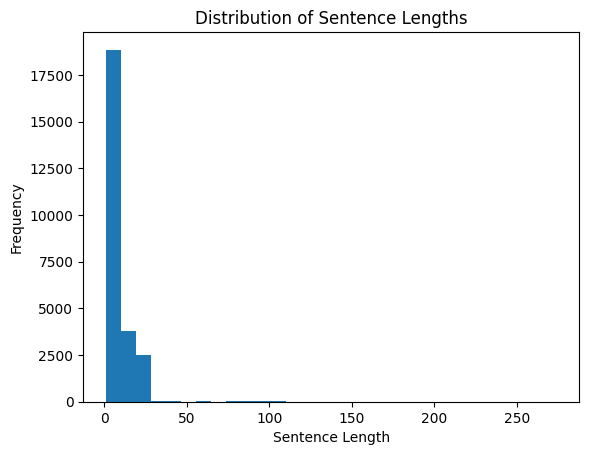

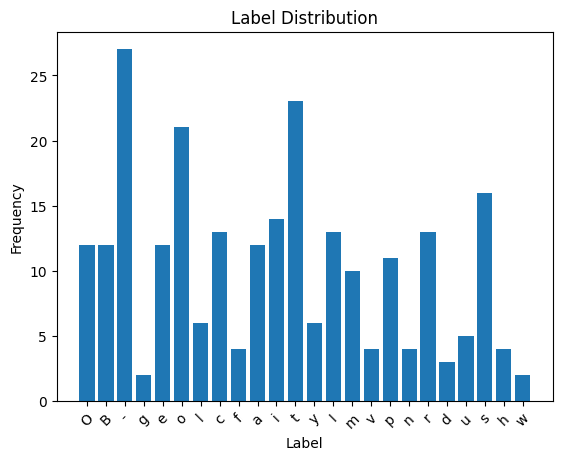

Number of Unique Words: 117
Label Types: {'s', 'h', 'f', 'y', 'B', 'c', 'g', 'o', 'I', '-', 'n', 'u', 'p', 'i', 'r', 'e', 'l', 'w', 't', 'a', 'O', 'd', 'm', 'v'}


In [24]:
import matplotlib.pyplot as plt

# Length of Sentences
sentence_lengths = [len(sentence) for sentence in words]

plt.hist(sentence_lengths, bins=30)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

# Label Distribution
label_counts = {}
for sentence_labels in labels:
    for label in sentence_labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

plt.bar(label_counts.keys(), label_counts.values())
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Unique Words
unique_words = set(word for sentence in words for word in sentence)
num_unique_words = len(unique_words)
print("Number of Unique Words:", num_unique_words)

# Label Types
label_types = set(label for sentence_labels in labels for label in sentence_labels)
print("Label Types:", label_types)
